### Lab 2: Probability, Distributions, and Statistical Questions
#### Jennifer Vo, partners with William Olsen

#### Problem 1

In this lab we will further explore probability, the use of sigma, and continuous and discrete distributions. In particular, we will look at using the convolutions and averages of multiple distributions and apply them to several hypothetical experiments.

In [1]:
# importing libraries we will use in the lab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# setting up graphing figure size
plt.rcParams["figure.figsize"] = (10,7)

For this first problem, let's imagine that we are looking for gamma-ray sources with the Fermi telescope, which has a background of cosmic rays that provides a discrete noise term following a Poisson distribution with an average of 2 cosmic rays/day. To detect a gamma-ray source, I need to ask, "what is the probability that the cosmic-ray background would have given me a measurement as signal-like or more than the signal that I received?" Let's assume that the average number of gamma-rays emitted by my hypothetical source is 5 gamma rays/day.

##### Part A. 
First, I will show how the probability distribution of the background changes as I integrate (sum) for more days.

I will start by plotting the background Poisson distribution.

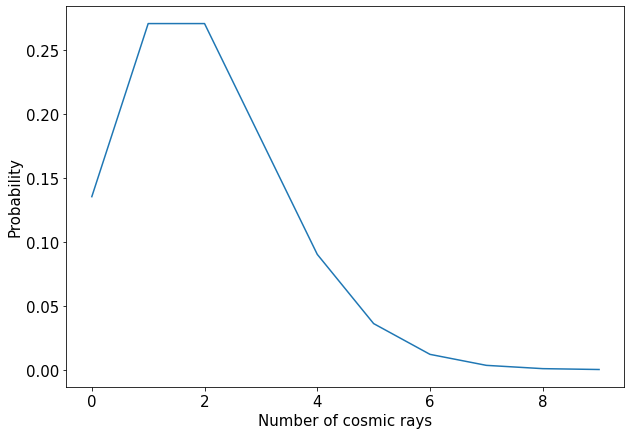

In [2]:
# Poisson lambda parameter = 2 rays/day
avg_bg = 2

# Gamma ray source average = 5 rays/day
avg_gr = 5

# Create the background Poisson distribution
fig, ax = plt.subplots(1,1)
x_poisson = []
y_poisson = []
for i in range (0, 10):
    x_poisson.append(i)
    y_poisson.append(stats.poisson.pmf(i, avg_bg))

#print(y_poisson)
plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.plot(x_poisson, y_poisson)
plt.show()

Next I will integrate (sum) the background distribution over 2 and 3 days, and plot them all on the same plot along with the original 1 day distribution.

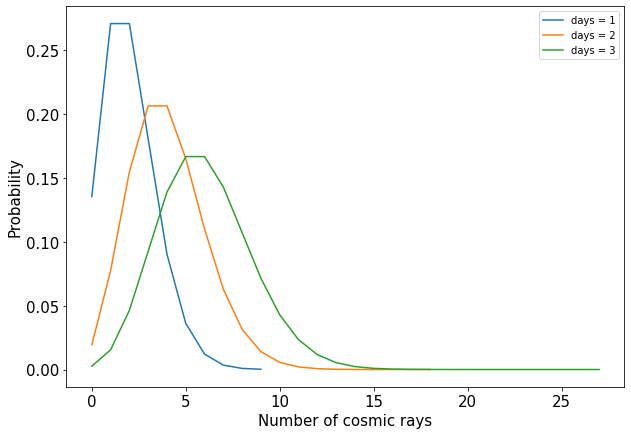

In [3]:
def calc_bin_width(x):
    size = len(x)
#     print(size, (x[size-1]-x[0])/size)
    return (x[size-1]-x[0])/size

def normalize(x, y):
    bin_width = calc_bin_width(x)
    sum_prob = 0
    for i in range (0, len(y)):
        sum_prob += y[i]*bin_width
        
    return y/sum_prob

# n = number of distributions being convolved
def convolve(n, p):
    conv_prob = p
    for i in range (0, n-1):
        conv_prob = np.convolve(conv_prob, p)
        size = len(conv_prob)
        x_values = []
        for i in range (0, size):
            x_values.append(i)
        
        conv_prob = normalize(x_values, conv_prob)
#         print(conv_prob)
        
    return x_values, conv_prob

x_values2, conv_prob2 = convolve(2, y_poisson)
x_values3, conv_prob3 = convolve(3, y_poisson)

plt.plot(x_poisson, y_poisson, label = f'days = 1')
plt.plot(x_values2, conv_prob2, label = f'days = 2')
plt.plot(x_values3, conv_prob3, label = f'days = 3')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

I can observe that as I sum more days, the probability distribution becomes wider and the distribution peak shifts to higher values of cosmic ray counts.

##### Part B.
Next, I will look at how the distribution looks after 5 days and I will ask the question: is the summed probability distribution still a Poisson distribution?

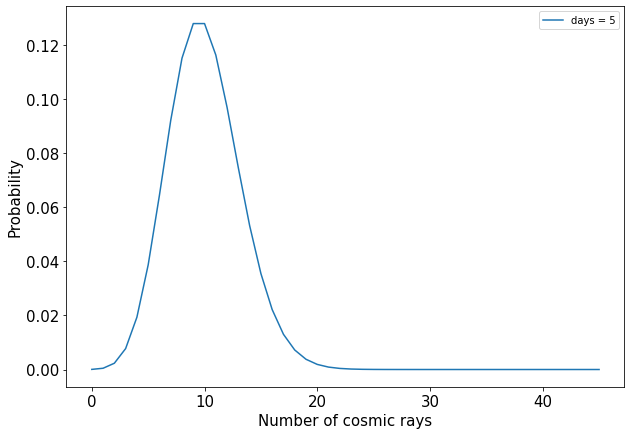

In [4]:
x_values5, conv_prob5 = convolve(5, y_poisson)
plt.plot(x_values5, conv_prob5, label = f'days = 5')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

Let's plot this on a semi-log plot to see the distribution shape more clearly. I can also compare it to a new Poisson distribution to see if the 5-day convolved probability distribution has a shape characteristic of a Poisson.

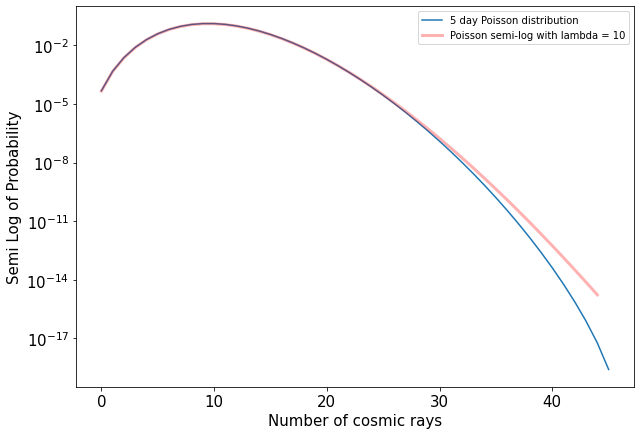

In [5]:
plt.plot(x_values5, conv_prob5, label = f'5 day Poisson distribution')

x_poisson_new = []
y_poisson_new = []
for i in range (0, 45):
    x_poisson_new.append(i)
    y_poisson_new.append(stats.poisson.pmf(i, 10, loc=0))
    
plt.plot(x_poisson_new, y_poisson_new, 'r', linewidth = 3, alpha = 0.3, label = 'Poisson semi-log with lambda = 10')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Semi Log of Probability', fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

As we can observe, for small numbers of cosmic rays, the 5 day Poisson distribution matches up very closely with a Poisson distribution. At a larger number of rays, around 30, it starts to diverge away from the Poisson distribution.

Given the fact that the Poisson distribution's lambda parameter is also equal to the mean, we can calculate the mean of the convolved 5 day distribution and compare to the mean of the Poisson distribution graphed with $\lambda$ = 10.

In [6]:
avg_conv5 = 0

for i in range (0, len(conv_prob5)):
    avg_conv5 += x_values5[i]*conv_prob5[i]
    
print(f'The mean of the 5 day Poisson distribution is lambda = {avg_conv5:.4f}.')

The mean of the 5 day Poisson distribution is lambda = 10.2203.


As we can see, the mean of the 5 day Poisson distribution is very close to the mean of the $\lambda$ = 10 Poisson distribution. The shape is characteristic of a Poisson, with a slightly different lambda parameter. I will conclude that the 5-day summed probability distribution is still a Poisson distribution.

Conceptually, summing multiple Poisson-distributed independent variables will still result in a Poisson distribution because the variables themselves are independent and Poisson-distributed. This means the probability of obtaining certain numbers of occurrences is still skewed to favor the events around a particular mean, with the higher number of occurrences becoming more and more rare. 

##### Part C.
Now let's average days and let's see how the probability distribution evolves. I will calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger.

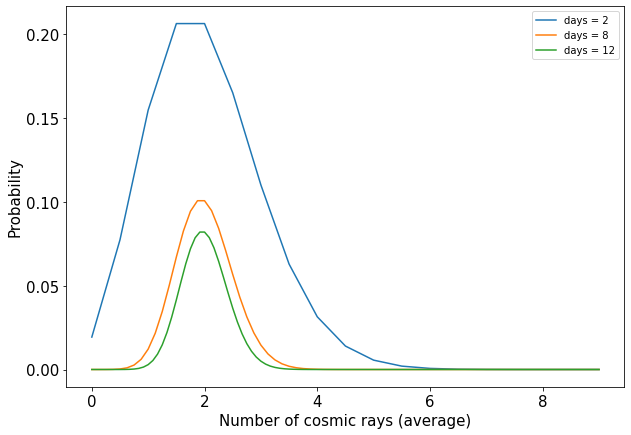

In [7]:
def avg_dist(n, p):
    x_values, conv_prob = convolve(n, p)
    
    size = len(conv_prob)
    x_avg = []
    for i in range (0, size):
        x_avg.append(x_values[i]/n)
    
    return x_avg, conv_prob

x_avg2, conv_prob2 = avg_dist(2, y_poisson)
x_avg8, conv_prob8 = avg_dist(8, y_poisson)
x_avg12, conv_prob12 = avg_dist(12, y_poisson)

plt.plot(x_avg2, conv_prob2, '-', label = f'days = 2')
plt.plot(x_avg8, conv_prob8, '-', label = f'days = 8')
plt.plot(x_avg12, conv_prob12, '-', label = f'days = 12')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays (average)', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

Here I can make the following observations:
- The width of the distribution tends to decrease as I average over more days
- The peak of the distribution stays at 2 occurences.

I can also plot these all on a semi-log graph to explore how the shape of the distribution changes.

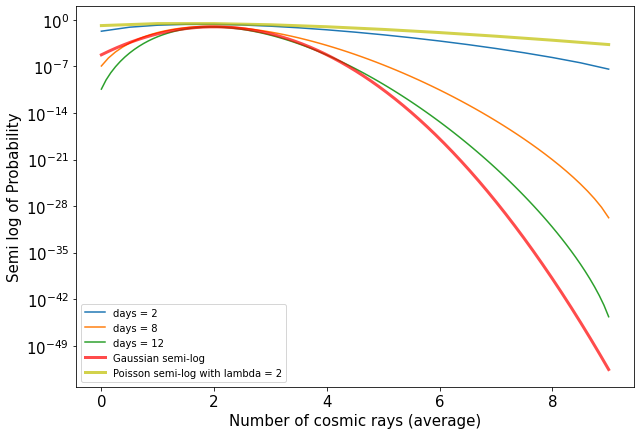

In [8]:
# Plot semi-log graphs for days = 2, 4, 8

plt.plot(x_avg2, conv_prob2, '-', label = f'days = 2')
plt.plot(x_avg8, conv_prob8, '-', label = f'days = 8')
plt.plot(x_avg12, conv_prob12, '-', label = f'days = 12')

x_gauss = np.linspace(0,9,1000)
y_gauss = 0.1*stats.norm.pdf(x_gauss, loc=2, scale = 1/2.2)
plt.plot(x_gauss, y_gauss, 'r', linewidth = 3, alpha = 0.7, label = 'Gaussian semi-log')

x_poisson_new = []
y_poisson_new = []
for i in range (0, 10):
    x_poisson_new.append(i)
    y_poisson_new.append(stats.poisson.pmf(i, 2, loc=0))
    
plt.plot(x_poisson_new, y_poisson_new, 'y', linewidth = 3, alpha = 0.7, label = 'Poisson semi-log with lambda = 2')

plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays (average)', fontsize = 15)
plt.ylabel('Semi log of Probability', fontsize = 15)
plt.yscale('log')
plt.legend()
plt.show()

When we plot these average distributions, the original Poisson distribution of $\lambda$ = 2, as well as the Gaussian distribution, all on a semi-log plot, I can observe that the distribution of cosmic rays occurences becomes more and more similar to an upside-down parabola, characteristic of a Gaussian, as I average over more days.

In part B, we saw that the sum of 5 Poisson distributions resulted in a shape that was still very clearly a Poisson distribution. Here, however, we see that averaging the Poisson distributions over more and more days results in the distribution appearing to resemble a Gaussian distribution. 

The central limit theorem states that most distributions, when sumed or averaged over enough trials, will converge to a Gaussian probability distribution function. Here, we saw that 5 sums was still showing a Poisson distribution, whereas the average of 12 Poissons begins to start resembling a Gaussian distribution.

##### Part D.

Recall that my original source has an average of 5 gamma rays/day, and the background noise (Poisson distributed) averages 2 rays/day.

Let's look at the case of taking measurements over multiple days. Say we take measurements over N = 2 days, and during this time I record Y x N = 5 x 2 = 10 gamma rays from my source. What would the 'sigma' of my observation be?

I will pose the following statistical question: "What is the probability of the background (the sum of 2 Poisson distributions with parameter for each of $\lambda$ = 2) giving me a data point that looks as signal like or more than the measurement I have (10 gamma rays)?"

Which can be converted to a mathematical expression, where pdf is the sum of 2 Poisson distributions with $\lambda$ = 2.
$$\text{Probability} = \int_{30}^{\infty} \text{pdf dx}$$

First I will determine the pdf of the background and plot it here.

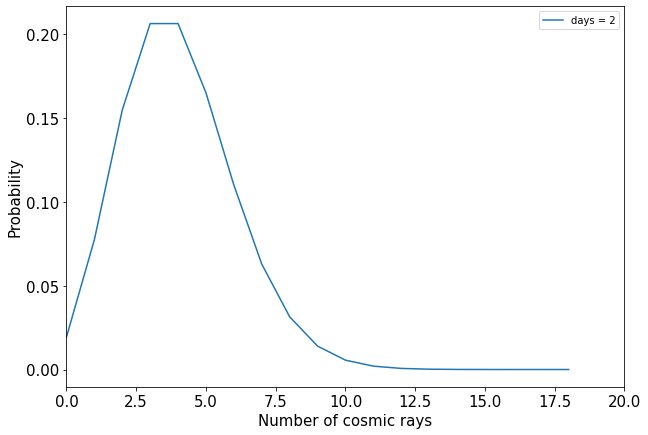

In [9]:
x_conv2, conv_prob2 = convolve(2, y_poisson)

plt.plot(x_conv2, conv_prob2, label = f'days = 2')
plt.tick_params(labelsize = 15)
plt.xlabel('Number of cosmic rays', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.xlim(0,20)
plt.legend()
plt.show()

Next, I need to integrate this pdf to calculate the probability to the right of 10 cosmic rays. We know that the sum of a small number of Poisson distributions is still a Poisson distribution. The arrays I used to set up the plot above is discretized with relatively large bin widths, and I want to be as precise as possible when calculating sigmas for measurements far away from the mean. In order to get a more precise probability, I will generate a Poisson pdf that has the same $\lambda$ parameter as the expectation value of the 2-day sum of Poisson distributions.

In [10]:
# Expected value of poisson = variance = lambda parameter
def calc_exp_value(x, y, p):
    exp_value = 0
    bin_width = calc_bin_width(x)
    for i in range (0, len(x)):
        exp_value += y[i]*(x[i]*bin_width)**p
    return exp_value

mean_poisson2 = calc_exp_value(x_conv2, conv_prob2, 1)
signal = 10

prob_conv2 = stats.poisson.cdf(signal, mean_poisson2)
sigma_conv2 = stats.norm.ppf(prob_conv2)
print(f'The probability that the background gave me a data point that looks as signal-like or more than {signal} gamma rays is {1-prob_conv2:.8f}.')
print(f'This corresponds to a sigma for my observation of {sigma_conv2:.2f}.')

The probability that the background gave me a data point that looks as signal-like or more than 10 gamma rays is 0.00283573.
This corresponds to a sigma for my observation of 2.77.


I have answered my question and determined that for a measurement of 10 gamma rays over 2 days, the corresponding probability is 2.83% and this corresponds to a sigma of 2.77.

#### Problem 2

Let's consider a skewed continuous distribution, an exponential distribution with parameter $\lambda$ = 2, as the background over an observation period of 1 hour. Let's first determine how the distribution changes as we average over more hours.

First I will plot the initial exponential distribution with parameter $\lambda$ = 2.

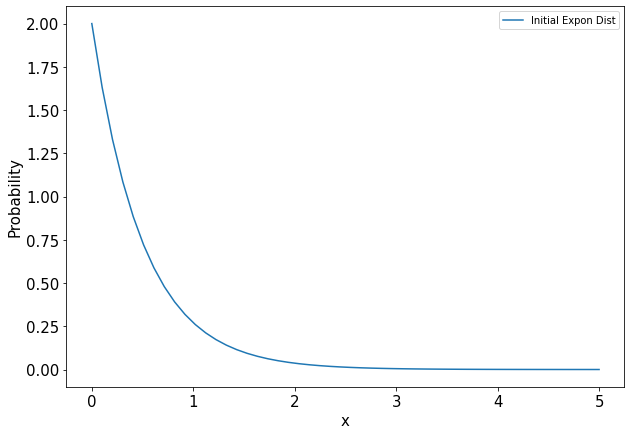

In [11]:
# Lambda = 2 implies scale = 1/lambda = 1/2
x_expon = np.linspace(0, 5, 50)
y_expon = stats.expon.pdf(x_expon, scale = 1/2)

plt.plot(x_expon, y_expon, label = 'Initial Expon Dist')
plt.tick_params(labelsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

##### Part A.

Now, I will plot several different averages. Let's try averaging our inital exponential distribution over 2 hours, 4 hours, and 8 hours.

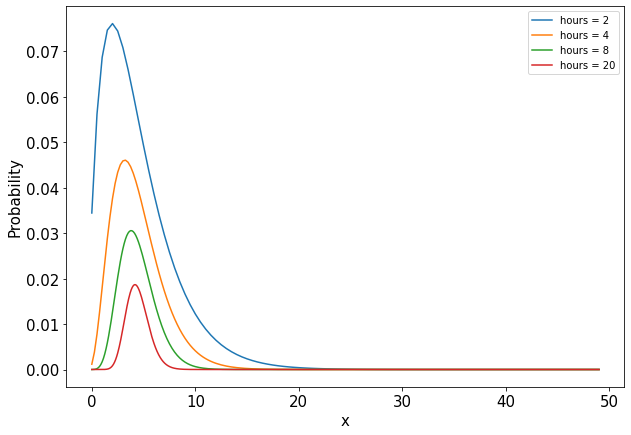

In [12]:
# Plotting several different averages
x_avg_expon2, y_conv_expon2 = avg_dist(2, y_expon)
x_avg_expon4, y_conv_expon4 = avg_dist(4, y_expon)
x_avg_expon8, y_conv_expon8 = avg_dist(8, y_expon)
x_avg_expon20, y_conv_expon20 = avg_dist(20, y_expon)
plt.plot(x_avg_expon2, y_conv_expon2, '-', label = f'hours = 2')
plt.plot(x_avg_expon4, y_conv_expon4, '-', label = f'hours = 4')
plt.plot(x_avg_expon8, y_conv_expon8, '-', label = f'hours = 8')
plt.plot(x_avg_expon20, y_conv_expon20, '-', label = f'hours = 20')

plt.tick_params(labelsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.legend()
plt.show()

I can make the following observations: 
- While the peak of the function is still close to x=2, it starts getting farther to the right as we increase the number of hours we average over.
- The width of the distribution also appears to decrease.

##### Part B. 
Let's now look at how the shape changes by plotting all the distributions on a semi-log plot. We want to compare it to a Gaussian distribution, and ask if it ever approaches a Gaussian distribution.

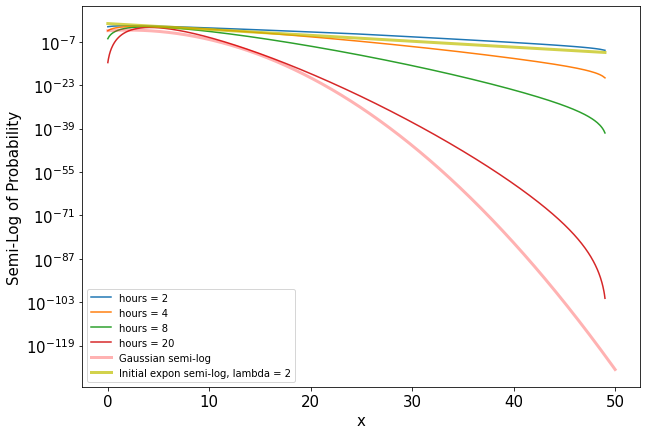

In [13]:
plt.plot(x_avg_expon2, y_conv_expon2, '-', label = f'hours = 2')
plt.plot(x_avg_expon4, y_conv_expon4, '-', label = f'hours = 4')
plt.plot(x_avg_expon8, y_conv_expon8, '-', label = f'hours = 8')
plt.plot(x_avg_expon20, y_conv_expon20, '-', label = f'hours = 20')

x_gauss = np.linspace(0,50,1000)
y_gauss = 0.01*stats.norm.pdf(x_gauss, loc=2, scale = 1/0.5)
plt.plot(x_gauss, y_gauss, 'r', linewidth = 3, alpha = 0.3, label = 'Gaussian semi-log')

x_expon_new = []
y_expon_new = []
for i in range (0, 50):
    x_expon_new.append(i)
    y_expon_new.append(stats.expon.pdf(i, loc = 0, scale = 2))
plt.plot(x_expon_new, y_expon_new, 'y', linewidth = 3, alpha = 0.7, label = 'Initial expon semi-log, lambda = 2')

plt.tick_params(labelsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('Semi-Log of Probability', fontsize = 15)

plt.yscale('log')
plt.legend()
plt.show()

Except for the ends of the distribution, which appear to get more and more frayed or exaggerated as we increase the number of intervals we average over, the distributions appear to shift its overall shape to more of a Gaussian upside-down parabola. Thus, I will conclude that the averages of exponential distribution does indeed also approach a Gaussian as we increase the number of intervals being averaged over.

#### Problem 3

For this problem we will explore using a large number of convolutions and how to take approximations in the limits of the extreme ends.

Let's assume we are using an optical telescope with a thermal noise background from the CCD. We will assume that after flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image. 

##### Version 1
Suppose I have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives me a very precise location, so I take an image of that part of the sky. But because of SWIFT's accuracy, I know which pixel in my image to look for a counterpart in.

##### Part A. 
Let's say that from looking at all the other pixels in my image, I can measure the width of the background Gaussian distribution as 2. Let's assume I see a signal of strength 10.5. I would like to know the answer to the question,

"What is the probability of the background giving me a data point that looks as signal like or more than the measurement I have?"

In order to calculate the significance of this detection, I will integrate the probability distribution to the right of the signal I measured to get the probability, which I can use to then find the corresponding normal PDF sigma value.

$$\text{Probability = } \int_{10.5}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} \text{exp}(-\frac{(x-\mu)^2}{2\sigma^2}) \text{dx}$$

where $\sigma$ is my Gaussian width of 2, and $\mu$ is my mean of 0.

I will calculate the answer to this question using the inbuilt cdf and ppf attributes of the stats.norm function to calculate a probability and convert that to a sigma value.

The sigma value is calculated as the number of standard deviations away from the mean in the normal distribution where the probability is equivalent to the probability I calculated with the above equation.

In [14]:
width1 = 2
signal1 = 10.5

prob1 = stats.norm.cdf(signal1, scale = width1)
sigma1 = stats.norm.ppf(prob1)
print(f'The significance of my detection of a signal of strength {signal1:.2f} is sigma = {sigma1:.4f}.')

The significance of my detection of a signal of strength 10.50 is sigma = 5.2500.


 With a significance of 5.25 sigma, I can claim a discovery which traditionally requires 5-sigma or more.

##### Version 2
Now suppose I receive an alert from LIGO, but no associated detection from SWIFT. I know what region of the sky to look in, but not which pixel.

##### Part B
If I had to look for a signal in 10k pixels, I would like to know the answer to the following statistical question:
"What is the probability of the background giving me a data point that looks as signal like or more than a measurement of signal strength 10.5?"

To answer this question, I first need to know what the probability distribution of the background is. The Gaussian for 1 pixel has a mean of zero and a standard deviation of 2. In order to get the probability distribution of 10,000 pixels I would need to calculate the sum of 10,000 one-pixel distributions. Instead of doing 10,000 sums, which requires a lot of processing power, I will instead approximate my background distribution by multiplying my original Gaussian distribution of 1 pixel by 10,000. Since we are working with an observation that is very rare in the original one-pixel Gaussian distribution, this approximation can be made. The following is the proof:

_The probability that the 1-pixel background produced an event less than or equal to my signal in part A is 1-P, where P is the integral from signal = 10.5 to infinity. In the 10,000-pixel case, the probability that the 10,000 pixel background produced events less than or equal to my signal is (1-P)^N = (1-P)^10000. For very small probabilities, this is approximately equal to 1-N P = 1 - 10000 P_

Therefore, the probability distribution of my background for 10,000 pixels is:
$$\text{pdf (background) = 10000} \frac{1}{\sigma\sqrt{2\pi}} \text{exp}(-\frac{(x-\mu)^2}{2\sigma^2}) $$

where again $\mu$ = 0 and $\sigma$ = 2.

##### Part C.
Now let's taking my brightest candidate signal from the region, assuming it has the signal of 10.5 and calculate the significance of my detection.

The mathematical equation that answers my statistical question is:

$$\text{Probability = } \int_{10.5}^{\infty} 10000\frac{1}{2\sqrt{2\pi}} \text{exp}(-\frac{x^2}{8}) dx$$

To calculate this, I will use the survival function (defined as 1-cdf) to calculate the probability, and the percent point function of a normal distribution (mean 0 and width 1) to generate the corresponding sigma value.

In [15]:
prob2 = 10000*stats.norm.sf(signal1, scale = width1)
sigma2 = stats.norm.ppf(prob2, scale = 1)
sigma2 = abs(sigma2)

print(f'The probability that the background over 10,000 pixels gave me a data point of {signal1} is {prob2:.6f}.')
print(f'This corresponds to a sigma value of {sigma2:.2f}.')

The probability that the background over 10,000 pixels gave me a data point of 10.5 is 0.000760.
This corresponds to a sigma value of 3.17.


A sigma value of 3.17 is not considered a discovery (5 sigma or greater).

#### Problem 4

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if I search through a million locations, I would expect to see approximately 1 one-in-a-million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

##### Part A.
First, let us calculate the signal required for a 5-sigma detection in Version 1. Here I will use the survival function and inverse survival function in order to make sure our probabilities are accurate, since we are working at the far ends of the distribution.

In [16]:
sigma = 5
prob_5sig = stats.norm.sf(sigma, scale = 1)

signal_reqA = stats.norm.isf(prob_5sig, scale = width1)
print(f'The signal required for a 5-sigma detection in Problem 3 Version 1 would be {signal_reqA:.2f}')

The signal required for a 5-sigma detection in Problem 3 Version 1 would be 10.00


##### Part B.
Next, let us calculate the signal required for a 5-sigma detection in Version 2. To inverse the probability to a signal, I will divide the probability by 10,000 (recall that the pdf of the 10k pixel background is approx. 10,000 times the pdf of the 1-pixel background), then I will call the inverse survival function as I did in Part A.

In [17]:
signal_reqB = stats.norm.isf(prob_5sig/10000, scale = width1)

print(f'The signal required for a 5-sigma detection in Problem 3 Version 2 would be {signal_reqB:.4f}.')

The signal required for a 5-sigma detection in Problem 3 Version 2 would be 13.1011.


##### Part C.
Let's compare these two required signals for 5-sigma detection. I can calculate the ratio of the signals required for a trials factor of 10k. 

In [18]:
ratio_trials10k = signal_reqB/signal_reqA
percent_brighter10k = ratio_trials10k - 1
print(f'The signal must be {100*percent_brighter10k:.2f}% brighter to obtain a 5-sigma event when we have a trials factor of 10k.')

The signal must be 31.01% brighter to obtain a 5-sigma event when we have a trials factor of 10k.


If I have a trials factor of 10,000, the signal must be 31% brighter for discovery. However, looking at my probability distributions, where the 10k pixel pdf is a scale factor of 10,000 times larger than the one-pixel pdf, the sensitivity penalty due to a trials factor seems quite low.

My intuition may lead me to believe that the signal has to be much larger for discovery, but this is not the case. If we have a probability of 0.1% of something to occur, then look for it 10,000 times, we would expect it to show up approximately 10 times. Thus, in order to measure a signal that has the same significance (or rarity) of occurring, the signal must be brighter. From intuition, we may want to assume that it must be 10,000 times brighter (linear dependence) or perhaps sqrt(N) = sqrt(10,000) = 100 times brighter (square root dependence). However, the distribution at the extreme ends has a different dependence, that is neither linear or sqrt root. 

##### Part D.
Let's further explore the trials factor by calculating how large the effect is on my 5-sigma sensitivity threshold if I change the trials factor significantly (say, increase from 10k to 100k)

In [19]:
signal_reqA = stats.norm.isf(prob_5sig, scale = width1)
signal_reqB = stats.norm.isf(prob_5sig/100000, scale = width1)
ratio_trials100k = signal_reqB/signal_reqA
percent_brighter100k = ratio_trials100k - 1
print(f'The signal must be {100*percent_brighter100k:.2f}% brighter to obtain a 5-sigma event when we have a trials factor of 100k.')

The signal must be 37.72% brighter to obtain a 5-sigma event when we have a trials factor of 100k.


We see that the signal must be only 37.72% brighter to obtain a 5-sigma event with a trials factor of 100k. This is a very small increase from our result with trials factor of 10k. This tells us there is an interesting dependence, and in order to obtain the same rarity with more and more trials we need less and less of a percent increase in brightness.

##### Extra Credit
Throughout this lab we saw that as I summed, or averaged over, more and more distributions they tended to better resemble a Gaussian shape. Thus, if I were working with a non-Gaussian distribution as my base pdf, then as I sum over many trials I expect to obtain a very similar sensitivity penalty as if I were working with a Gaussian distribution.